# DNN (Deep Neural Network) :

Epoch 1/50
23226/23226 [==============================] - 234s 10ms/step - loss: 0.5642 - accuracy: 0.7233 - val_loss: 0.5269 - val_accuracy: 0.7365
Epoch 2/50
23226/23226 [==============================] - 283s 12ms/step - loss: 0.5371 - accuracy: 0.7364 - val_loss: 0.5074 - val_accuracy: 0.7503
Epoch 3/50
23226/23226 [==============================] - 291s 13ms/step - loss: 0.5256 - accuracy: 0.7456 - val_loss: 0.4824 - val_accuracy: 0.7833
Epoch 4/50
23226/23226 [==============================] - 286s 12ms/step - loss: 0.5083 - accuracy: 0.7608 - val_loss: 0.4510 - val_accuracy: 0.7979
Epoch 5/50
23226/23226 [==============================] - 282s 12ms/step - loss: 0.4917 - accuracy: 0.7704 - val_loss: 0.4344 - val_accuracy: 0.8046
Epoch 6/50
23226/23226 [==============================] - 287s 12ms/step - loss: 0.4779 - accuracy: 0.7787 - val_loss: 0.4062 - val_accuracy: 0.8140
Epoch 7/50
23226/23226 [==============================] - 292s 13ms/step - loss: 0.4682 - accuracy: 0.7848

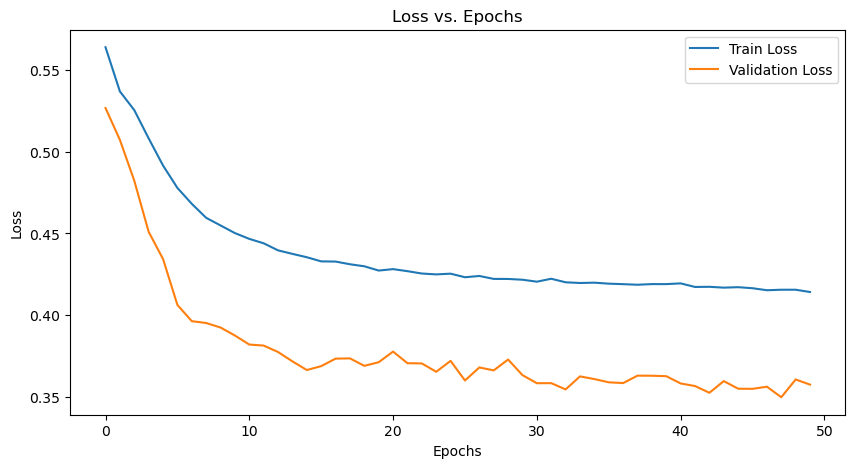

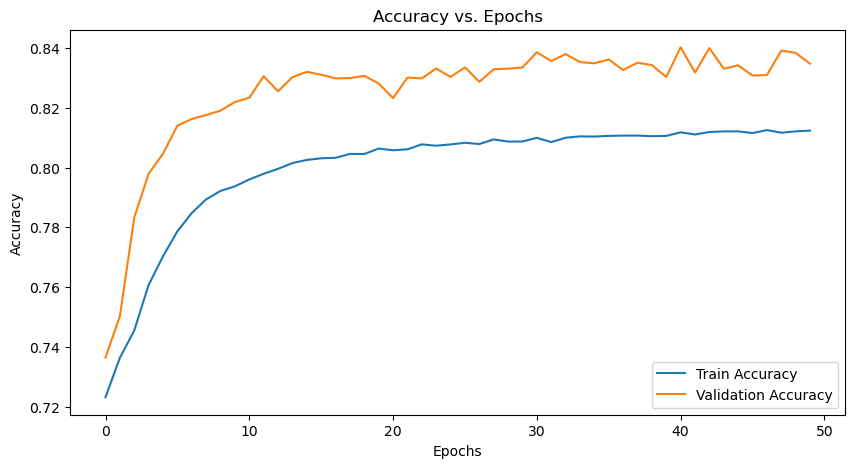

7742/7742 [==============================] - 12s 1ms/step
Accuracy: 0.8257689513199322
Precision: 0.7947612925845848
Recall: 0.8783744510462412
F1 Score: 0.8344786330030372
auc-Score: 0.83


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Chargement du dataset
df = pd.read_csv('../dataset_smote.csv')

# Séparation des features (X) et de la variable cible (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Créez le modèle DNN
model = models.Sequential()

# Couches fully connected (densément connectées) avec Dropout
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))

# Couche de sortie
model.add(layers.Dense(1, activation='sigmoid'))  # Une seule sortie binaire (fraude ou non)

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy pour une classification binaire
              metrics=['accuracy'])

# Entraînez le modèle avec plus d'epochs
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))

# Visualisation de l'historique d'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()


# Visualisation de l'historique d'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Utilisez 'accuracy' ou 'acc' selon votre historique
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Utilisez 'val_accuracy' ou 'val_acc'
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.show()

# Prédictions sur l'ensemble de test avec un seuil de décision de 0.3
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.3)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"auc-Score: {auc:.2f}")


In [2]:

# Calcul des métriques
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


dnn_results = pd.DataFrame([['Deep neurual network', acc,prec,rec, f1, auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Sauvegardez le DataFrame dans un fichier CSV
dnn_results.to_csv('../evaluations/dnn_results.csv', index=False)

dnn_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Deep neurual network,0.825769,0.794761,0.878374,0.834479,0.825768


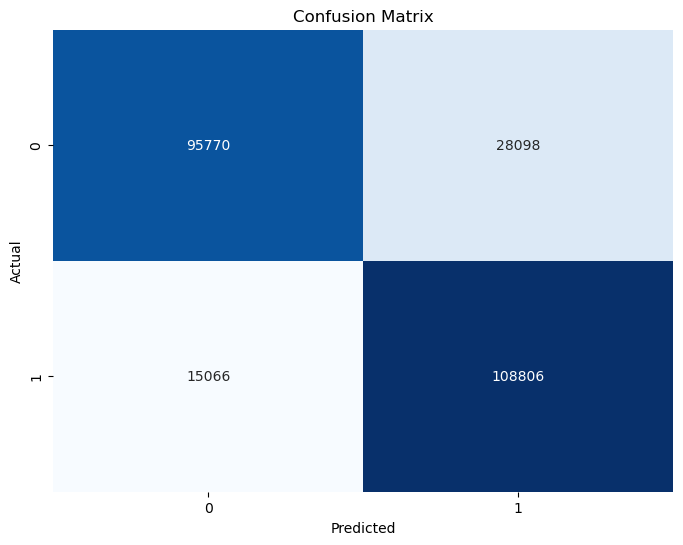

In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Affichage de la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()